# Análisis descriptivo

###  1. Descripción general del dataset

In [2]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()
import matplotlib.pyplot as plt
import seaborn as sns

Se carga el dataframe

In [3]:
final_xgboost_data_path = os.path.join(current_dir, "../data/raw/Final_XGBoost_data_processed.csv")
data = pd.read_csv(final_xgboost_data_path)

In [4]:
data.head(5)

,item_id,store_id,month,sales,event_name_1,snap_CA,snap_TX,snap_WI,sell_price,snap,lag_1,lag_2,lag_3,lag_6,lag_12,rolling_mean_3,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,FOODS_1_012,CA_2,2012-01-01,0,1,1,1,0,6.08000,1,0.0,0.0,0.0,11.0,0.0,0.0,2012,True,False,False,False,False,False,False,False,False,False,False,False
1,FOODS_1_012,CA_2,2012-02-01,0,1,1,1,0,6.08000,1,0.0,0.0,0.0,21.0,0.0,0.0,2012,False,True,False,False,False,False,False,False,False,False,False,False
2,FOODS_1_012,CA_2,2012-03-01,0,1,1,1,0,6.08000,1,0.0,0.0,0.0,0.0,0.0,0.0,2012,False,False,True,False,False,False,False,False,False,False,False,False
3,FOODS_1_012,CA_2,2012-04-01,0,1,1,1,0,6.08000,1,0.0,0.0,0.0,0.0,0.0,0.0,2012,False,False,False,True,False,False,False,False,False,False,False,False
4,FOODS_1_012,CA_2,2012-05-01,60,1,1,1,0,5.90675,1,0.0,0.0,0.0,0.0,0.0,0.0,2012,False,False,False,False,True,False,False,False,False,False,False,False


Se comprueban valores nulos

In [5]:
isna_sum = data.isna().sum()

isna_sum.sort_values(ascending = False)

item_id           0
store_id          0
month             0
sales             0
event_name_1      0
snap_CA           0
snap_TX           0
snap_WI           0
sell_price        0
snap              0
lag_1             0
lag_2             0
lag_3             0
lag_6             0
lag_12            0
rolling_mean_3    0
year              0
month_1           0
month_2           0
month_3           0
month_4           0
month_5           0
month_6           0
month_7           0
month_8           0
month_9           0
month_10          0
month_11          0
month_12          0
dtype: int64

In [6]:
data.columns

Index(['item_id', 'store_id', 'month', 'sales', 'event_name_1', 'snap_CA',
       'snap_TX', 'snap_WI', 'sell_price', 'snap', 'lag_1', 'lag_2', 'lag_3',
       'lag_6', 'lag_12', 'rolling_mean_3', 'year', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

`item_id`: Identificador único del producto o artículo.

`store_id`: Identificador único de la tienda donde se vendió el producto.

`month`: Fecha mensual en formato de periodo de tiempo.

`sales`: Total de unidades vendidas del producto en la tienda en ese mes.

`event_name_1`: Nombre del evento especial asociado a ese día/mes, como un feriado o promoción. Puede ser nulo si no hubo evento.

`snap_CA`: Indican si un día está cubierto por el programa SNAP en California.

`snap_TX`: Indican si un día está cubierto por el programa SNAP en Texas.

`snap_WI`: Indican si un día está cubierto por el programa SNAP en Wisconsin.

`sell_price`: Precio promedio al que se vendió el producto en ese mes.

`snap`: Esta columna representa si el día o mes tiene un beneficio del programa SNAP (Supplemental Nutrition Assistance Program) activo.

`lag_1, lag_2, lag_3, lag_6, lag_12`: Estas columnas son características de retraso (lag features) que representan las ventas del mismo producto en la misma tienda, pero con un desfase anterior de 1 mes, 2 meses, 3 meses, 6 meses y 12 meses. Ayudan al modelo a capturar patrones históricos y estacionalidades.

`rolling_mean_3`: Es el promedio móvil de ventas de los últimos 3 meses, excluyendo el mes actual. Útil para detectar tendencias suaves a corto plazo.

`month_1 a month_12`: Estas columnas son variables one-hot encoded para representar el mes en que ocurre la venta. Permiten al modelo capturar la estacionalidad mensual, como picos de ventas en diciembre o caídas en enero, etc.



 ### 2. Estadísticas descriptivas básicas
 Se obtienen valores de media, mediana, moda, desviación estándar, rango, percentiles, cuartiles y la distribución

In [7]:
data.describe()

,sales,event_name_1,snap_CA,snap_TX,snap_WI,sell_price,snap,lag_1,lag_2,lag_3,lag_6,lag_12,rolling_mean_3,year
count,10600.000000,10600.000000,10600.0,10600.0,10600.0,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,692.175660,0.962264,1.0,1.0,0.0,1.608005,0.700000,697.322736,698.533019,700.308302,699.860755,670.847453,698.721352,2013.735849
std,624.023876,0.190566,0.0,0.0,0.0,1.011744,0.458279,635.758060,642.589797,651.082129,658.105513,660.663182,610.286747,1.290826
min,0.000000,0.000000,1.0,1.0,0.0,0.156667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,326.000000,1.000000,1.0,1.0,0.0,1.000000,0.000000,327.000000,326.000000,324.750000,319.000000,287.750000,341.583333,2013.000000
50%,535.000000,1.000000,1.0,1.0,0.0,1.480000,1.000000,538.000000,537.000000,536.000000,535.000000,513.000000,532.666667,2014.000000
75%,876.000000,1.000000,1.0,1.0,0.0,1.680000,1.000000,881.000000,881.000000,883.000000,885.250000,866.000000,866.333333,2015.000000
max,10821.000000,1.000000,1.0,1.0,0.0,6.980000,1.000000,10821.000000,10821.000000,10821.000000,10821.000000,10821.000000,8404.000000,2016.000000


### 3. Análisis descriptivo por columna

In [22]:
data.columns

Index(['item_id', 'store_id', 'month', 'sales', 'event_name_1', 'snap_CA',
       'snap_TX', 'snap_WI', 'sell_price', 'snap', 'lag_1', 'lag_2', 'lag_3',
       'lag_6', 'lag_12', 'rolling_mean_3', 'year', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

#### Sales

In [23]:
print(data.sales.describe())
print(f'Median: {data.sales.median()}')
print(f'Mode: {data.sales.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(data.sales) - min(data.sales)
print(f"Rango: {range_}")

count    10600.000000
mean       692.175660
std        624.023876
min          0.000000
25%        326.000000
50%        535.000000
75%        876.000000
max      10821.000000
Name: sales, dtype: float64
Median: 535.0
Mode: 0
Rango: 10821


- Comprobamos los valores únicos que tenemos de productos

In [24]:
data['item_id'].nunique()

66

- En la columna sales vemos que de media sale 692.17 productos y un máximo de 10821. ``Como estamos representando 516 productos por cada día, podemos ver que tenemos ventas todos los días de al menos más de 1 producto y que hay picos en los que alguna referencia se han vendido 294 unidades.``

- Moda: vemos que el valor más repetidos del subconjunto seleccionado para las ventas por producto es 0.

- Mediana: vemos que el valor central del conjunto de datos es 535.

Se comprueba si hay valores nulos:

In [25]:
print(data.sales.isnull().sum())

0


Se comprueba los valores únicos:

In [26]:
print(data.sales.nunique())

2077


In [27]:
data.sales.dtype

dtype('int64')

- Distribución: Se observa que sigue una distribución normal sesgada a la izquierda.

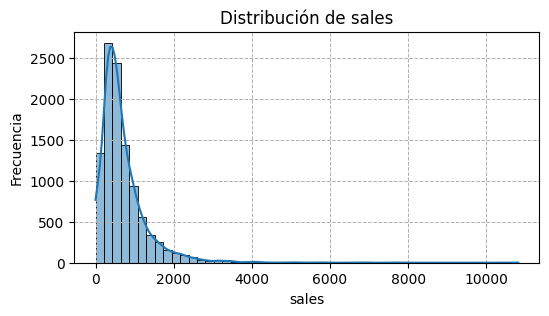

In [28]:
plt.figure(figsize=(6,3))
sns.histplot(data['sales'], kde=True, bins=50)
plt.title('Distribución de sales')
plt.xlabel('sales')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

#### Sell_price

In [30]:
print(data.sell_price.describe())
print(f'Median: {data.sell_price.median()}')
print(f'Mode: {data.sell_price.mode()[0]}') # He puesto el [0] para mostrar solo el valor de la moda porque si no aparece con el indice.  
range_ = max(data.sell_price) - min(data.sell_price)
print(f"Rango: {range_}")

count    10600.000000
mean         1.608005
std          1.011744
min          0.156667
25%          1.000000
50%          1.480000
75%          1.680000
max          6.980000
Name: sell_price, dtype: float64
Median: 1.48
Mode: 1.58
Rango: 6.823333333333335


Se comprueba si hay valores nulos:

In [31]:
print(data.sell_price.isnull().sum())

0


Se comprueba los valores únicos:

In [32]:
print(data.sell_price.nunique())

447


In [33]:
data.sell_price.dtype

dtype('float64')

- Distribución

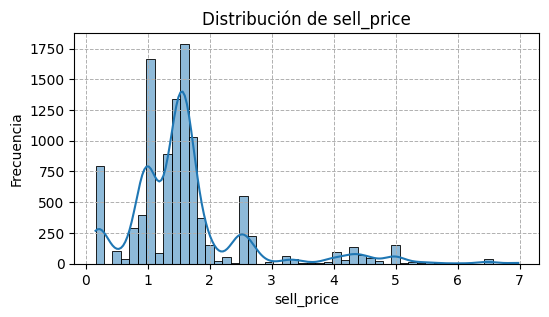

In [34]:
plt.figure(figsize=(6,3))
sns.histplot(data['sell_price'], kde=True, bins=50)
plt.title('Distribución de sell_price')
plt.xlabel('sell_price')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

### 4. Correlaciones y relaciones entre variables

### 5. Detección de valores atípicos